In [1]:

# Imports
import os
import sys
import cmath
import math
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import sympy as sp
from sympy.utilities.lambdify import lambdify
from scipy import signal
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from matplotlib.ticker import LogLocator

### Problem 1

Switch $[0<t<DT_s]$

$\begin{eqnarray}
0 &=& V_g - v_L - v\\[0.25em]
v_L &=& V_g - v \\[0.25em]
\frac{di_L}{dt} &=& \frac{V_g - v}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
0 &=& V_g + v_L \\[0.25em]
v_L &=& -V_g \\[0.25em]
\frac{di_L}{dt} &=& \frac{-V_g}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

Total Volt Seconds over 1 period for Inductor Voltage (small ripple approx)

$\begin{eqnarray}
<v_L> &=& \frac{1}{T_S} \int_{o}^{T_S} v_L(t) dt \\[0.25em]
0 &=& \left[D \cdot (V_g- V)\right] + \left[D' \cdot (-V_g) \right] \\[0.25em]
0 &=& (D-D') V_g - D V \\[0.25em]
V &=& V_g\frac{(D-D')}{D} = V_g\frac{(2D -1)}{D} & [\text{Output Voltage }V] \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[0<t<DT_s]$

$\begin{eqnarray}
i_C &=& i_L -\frac{v}{R} \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
i_C &=& -\frac{v}{R} \\[0.25em]
\end{eqnarray}$

Total Volt Seconds over 1 period for Capacitor Current (small ripple approx)

$\begin{eqnarray}
<i_C> &=& \frac{1}{T_S} \int_{o}^{T_S} i_C(t) dt \\[0.25em]
0 &=& \left[D \cdot (I-\frac{V}{R})\right] + \left[(D') \cdot (- \frac{V}{R})\right] \\[0.25em]
0 &=& D I -(D+D')(\frac{V}{R}) \\[0.25em]
0 &=& D I -(\frac{V}{R}) \\[0.25em]
I &=& \frac{V}{RD} \\[0.25em]
I &=& V_g\frac{(2D -1)}{D} \frac{1}{RD} \\[0.25em]
I &=& \frac{V_g}{R} \frac{(2D -1)}{D^2} && [\text{Inductor Current }I] \\[0.25em]
\end{eqnarray}$

<hr>

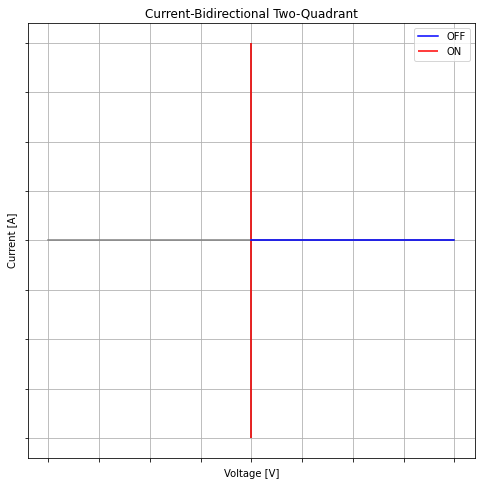

In [2]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Current-Bidirectional Two-Quadrant')
ax.vlines(x=[0], ymin=-1, ymax=1, colors='grey')
ax.plot(np.linspace(-1,1,10),np.zeros(10),c='grey')
ax.vlines(x=[0], ymin=-1, ymax=1, colors='r', label='ON')
ax.plot(np.linspace(0,1,10),np.zeros(10),c='blue', label='OFF')
ax.set_ylabel('Current [A]')
ax.set_xlabel('Voltage [V]')
ax.grid(which='both', axis='both')
ax.legend()
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show();

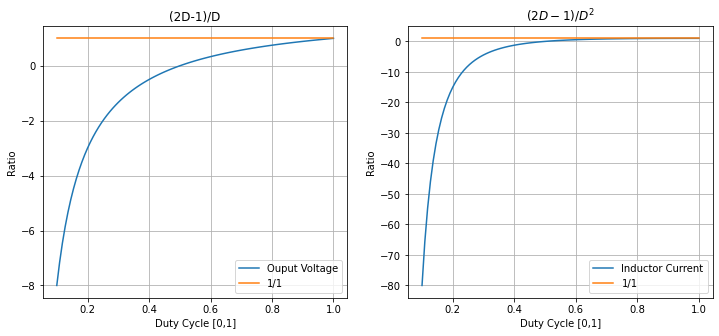

In [3]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
D = np.linspace(0.1,1,100)

ax[0].set_title('(2D-1)/D')
ax[0].plot(D,(2*D-1)/D,label='Ouput Voltage')
ax[0].plot(D,np.ones(100),label='1/1')
ax[0].set_ylabel('Ratio')
ax[0].set_xlabel('Duty Cycle [0,1]')
ax[0].grid(which='both', axis='both')
ax[0].legend()

ax[1].set_title('$(2D-1)/D^2$')
ax[1].plot(D,(2*D-1)/D**2,label='Inductor Current')
ax[1].plot(D,np.ones(100),label='1/1')
ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Duty Cycle [0,1]')
ax[1].grid(which='both', axis='both')
ax[1].legend()
plt.show();

### Problem 2

Switch $[0<t<DT_s]$

$\begin{eqnarray}
0 &=& V_g - v_L - v\\[0.25em]
v_L &=& V_g - v \\[0.25em]
\frac{di_L}{dt} &=& \frac{V_g - v}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
0 &=& V_g - v_L + v\\[0.25em]
v_L &=& V_g + v \\[0.25em]
\frac{di_L}{dt} &=& \frac{V_g + v}{L} && [i_L \text{ slope}] \\[0.25em]
\end{eqnarray}$

Total Volt Seconds over 1 period for Inductor Voltage (small ripple approx)

$\begin{eqnarray}
<v_L> &=& \frac{1}{T_S} \int_{o}^{T_S} v_L(t) dt \\[0.25em]
0 &=& \left[D \cdot (V_g- V)\right] + \left[D' \cdot (V_g + V) \right] \\[0.25em]
0 &=& (D+D') V_g + (D'-D) V \\[0.25em]
0 &=& V_g + (1-2D) V \\[0.25em]
V &=& -V_g\frac{1}{1-2D} = V_g\frac{1}{2D-1} & [\text{Output Voltage }V] \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[0<t<DT_s]$

$\begin{eqnarray}
i_C &=& i_L -\frac{v}{R} \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
-i_L &=& i_C +\frac{v}{R} \\[0.25em]
i_C &=& -(i_L+\frac{v}{R}) \\[0.25em]
\end{eqnarray}$

Total Volt Seconds over 1 period for Capacitor Current (small ripple approx)

$\begin{eqnarray}
<i_C> &=& \frac{1}{T_S} \int_{o}^{T_S} i_C(t) dt \\[0.25em]
0 &=& \left[D \cdot (I-\frac{V}{R})\right] + \left[(D') \cdot (-I- \frac{V}{R})\right] \\[0.25em]
0 &=& (D-D') I +(D+D')(\frac{-V}{R}) \\[0.25em]
0 &=& (D-D') I -(\frac{V}{R}) \\[0.25em]
I &=& (\frac{V}{R}) \frac{1}{D-D'} \\[0.25em]
I &=& (\frac{V}{R}) \frac{1}{2D-1} \\[0.25em]
I &=& \frac{V_g}{R} \cdot \frac{1}{2D -1} \cdot \frac{1}{2D -1} \\[0.25em]
I &=& \frac{V_g}{R} \frac{1}{(2D -1)^2}= \frac{V_g}{R} \frac{1}{(D -D')^2} && [\text{Inductor Current }I] \\[0.25em]
\end{eqnarray}$

<hr>

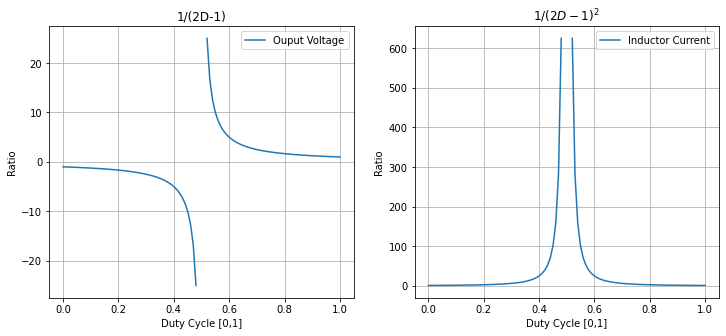

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
D0 = np.linspace(0,0.48,50)
D1 = np.linspace(0.52,1,50)

ax[0].set_title('1/(2D-1)')
ax[0].plot(D0,1/(2*D0-1),c='tab:blue',label='Ouput Voltage')
ax[0].plot(D1,1/(2*D1-1),c='tab:blue')
ax[0].set_ylabel('Ratio')
ax[0].set_xlabel('Duty Cycle [0,1]')
ax[0].grid(which='both', axis='both')
ax[0].legend()

ax[1].set_title('$1/(2D-1)^2$')
ax[1].plot(D0,1/(2*D0-1)**2,c='tab:blue',label='Inductor Current')
ax[1].plot(D1,1/(2*D1-1)**2,c='tab:blue')
ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Duty Cycle [0,1]')
ax[1].grid(which='both', axis='both')
ax[1].legend()
plt.show();

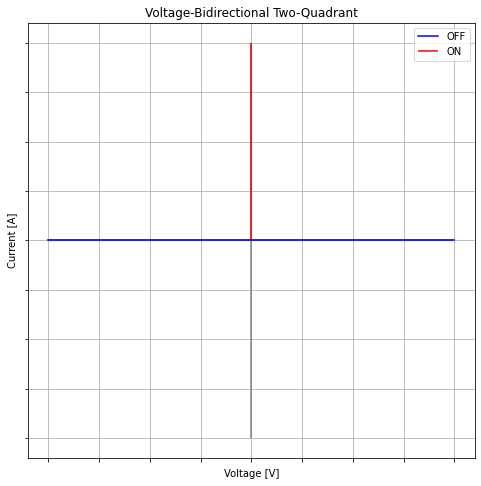

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Voltage-Bidirectional Two-Quadrant')
ax.vlines(x=[0], ymin=-1, ymax=1, colors='grey')
ax.plot(np.linspace(-1,1,10),np.zeros(10),c='grey')
ax.vlines(x=[0], ymin=0, ymax=1, colors='r', label='ON')
ax.plot(np.linspace(-1,1,10),np.zeros(10),c='blue', label='OFF')
ax.set_ylabel('Current [A]')
ax.set_xlabel('Voltage [V]')
ax.grid(which='both', axis='both')
ax.legend()
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show();

### Problem 3

Switch $[0<t<DT_s]$

$\begin{eqnarray}
0 &=& V_g - v_{L_1} \\[0.25em]
v_{L_1} &=& V_g  \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
0 &=& v_{L_1} - v_{C_1}\\[0.25em]
v_{L_1} &=& v_{C_1} \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[0<t<DT_s]$

$\begin{eqnarray}
0 &=& V_g - v_{C_1} - v_{L_2} - v \\[0.25em]
v_{L_2} &=& V_g - v_{C_1} - v  \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
0 &=& -v_{L_2} - v \\[0.25em]
v_{L_2} &=& -v \\[0.25em]
\end{eqnarray}$

<hr>

Total Volt Seconds over 1 period for $V_{L_1}$ (small ripple approx)

$\begin{eqnarray}
<v_{L_1}> &=& \frac{1}{T_S} \int_{o}^{T_S} v_{L_1}(t) dt \\[0.25em]
0 &=& \left[D \cdot (V_g)\right] + \left[D' \cdot (V_{C_1}) \right] \\[0.25em]
V_{C_1} &=& -V_g \frac{D}{D'}  & [\text{Capacitor_1 Voltage}] \\[0.25em]
\end{eqnarray}$

<hr>

Total Volt Seconds over 1 period for $V_{L_2}$  (small ripple approx)

$\begin{eqnarray}
<v_{L_2}> &=& \frac{1}{T_S} \int_{o}^{T_S} v_{L_2}(t) dt \\[0.25em]
0 &=& \left[D \cdot (V_g - V_{C_1} - V)\right] + \left[D' \cdot (- V) \right] \\[0.25em]
0 &=& D V_g - D V_{C_1} - (D+D')'V \\[0.25em]
0 &=& D V_g - D V_{C_1} - V \\[0.25em]
V &=& D V_g - (V_g \frac{D}{D'})D\\[0.25em]
V &=& V_g \cdot D (1 + \frac{D}{D'})  & [\text{Output Voltage }V] \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[0<t<DT_s]$

$\begin{eqnarray}
i_{C_1} &=& i_{L_2} \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
i_{C_1} &=& -i_{L_1} \\[0.25em]
\end{eqnarray}$

<hr>

Switch $[0<t<DT_s]$

$\begin{eqnarray}
i_{C_2} &=& i_{L_2} -\frac{v}{R} \\[0.25em]
\end{eqnarray}$

Switch $[DT_s<t<T_s]$

$\begin{eqnarray}
i_{C_2} &=& i_{L_2}-\frac{v}{R} \\[0.25em]
\end{eqnarray}$

<hr>

Total Volt Seconds over 1 period for $i_{C_2}$ (small ripple approx)

$\begin{eqnarray}
<i_{C_2}> &=& \frac{1}{T_S} \int_{o}^{T_S} i_{C_2}(t) dt \\[0.25em]
0 &=& \left[D \cdot (I_{L_2}-\frac{V}{R})\right] + \left[D' \cdot (I_{L_2}-\frac{V}{R})\right] \\[0.25em]
0 &=& I_{L_2}-\frac{V}{R} \\[0.25em]
I_{L_2} &=& \frac{V}{R} \\[0.25em]
I_{L_2} &=& \frac{V_g}{R}\cdot D (1 + \frac{D}{D'}) && [\text{Inductor Current }I_{L_2}] \\[0.25em]
\end{eqnarray}$

<hr>

Total Volt Seconds over 1 period for $i_{C_1}$ (small ripple approx)

$\begin{eqnarray}
<i_{C_1}> &=& \frac{1}{T_S} \int_{o}^{T_S} i_{C_1}(t) dt \\[0.25em]
0 &=& \left[D \cdot (I_{L_2})\right] + \left[(D') \cdot (-I_{L_1})\right] \\[0.25em]
0 &=& D I_{L_2} - D'I_{L_1} \\[0.25em]
I_{L_1} &=& \frac{D}{D'} I_{L_2} \\[0.25em]
I_{L_1} &=& \frac{D}{D'} \frac{V}{R} \\[0.25em]
I_{L_1} &=& \frac{V_g}{R} \cdot \frac{D^2}{D'} (1 + \frac{D}{D'}) && [\text{Inductor Current }I_{L_1}] \\[0.25em]
\end{eqnarray}$

<hr>

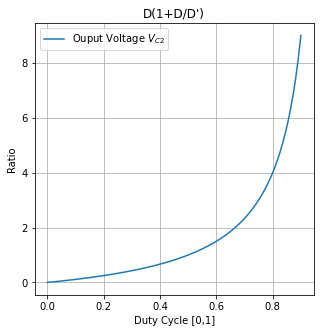

In [13]:
fig, ax = plt.subplots(figsize=(5,5))
D = np.linspace(0,0.9,100)
D_p = 1- D

ax.set_title('D(1+D/D\')')
ax.plot(D,D*(1+D/D_p),c='tab:blue',label='Ouput Voltage $V_{C2}$')
ax.set_ylabel('Ratio')
ax.set_xlabel('Duty Cycle [0,1]')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

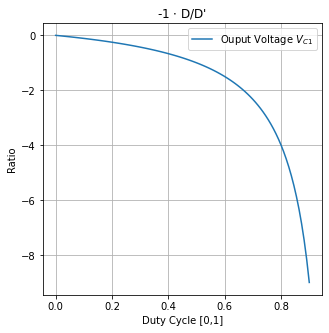

In [20]:
fig, ax = plt.subplots(figsize=(5,5))
D = np.linspace(0,0.9,100)
D_p = 1- D

ax.set_title('-1 $\cdot$ D/D\'')
ax.plot(D,-D/D_p,c='tab:blue',label='Ouput Voltage $V_{C1}$')
ax.set_ylabel('Ratio')
ax.set_xlabel('Duty Cycle [0,1]')
ax.grid(which='both', axis='both')
ax.legend()
plt.show();

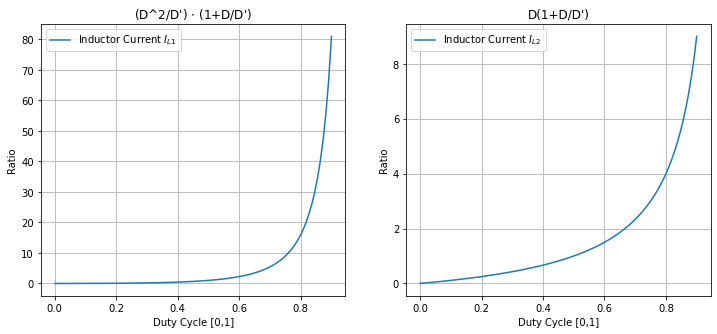

In [14]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
D = np.linspace(0,0.9,100)
D_p = 1- D

ax[0].set_title('(D^2/D\') $\cdot$ (1+D/D\')')
ax[0].plot(D,(D**2)/D_p*(1+D/D_p),c='tab:blue',label='Inductor Current $I_{L1}$')
ax[0].set_ylabel('Ratio')
ax[0].set_xlabel('Duty Cycle [0,1]')
ax[0].grid(which='both', axis='both')
ax[0].legend()

ax[1].set_title('D(1+D/D\')')
ax[1].plot(D,D*(1+D/D_p),c='tab:blue',label='Inductor Current $I_{L2}$')
ax[1].set_ylabel('Ratio')
ax[1].set_xlabel('Duty Cycle [0,1]')
ax[1].grid(which='both', axis='both')
ax[1].legend()
plt.show();

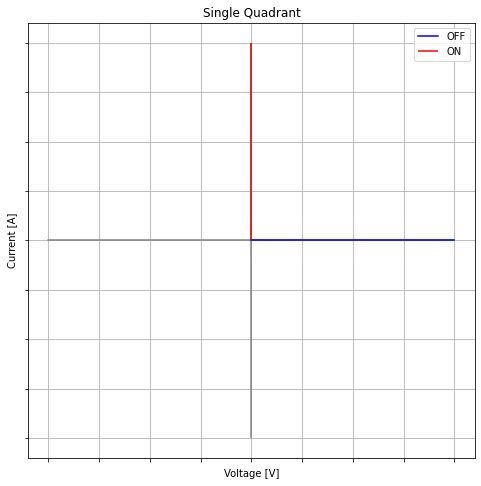

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Single Quadrant')
ax.vlines(x=[0], ymin=-1, ymax=1, colors='grey')
ax.plot(np.linspace(-1,1,10),np.zeros(10),c='grey')
ax.vlines(x=[0], ymin=0, ymax=1, colors='r', label='ON')
ax.plot(np.linspace(0,1,10),np.zeros(10),c='blue', label='OFF')
ax.set_ylabel('Current [A]')
ax.set_xlabel('Voltage [V]')
ax.grid(which='both', axis='both')
ax.legend()
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show();